<a href="https://colab.research.google.com/github/mariabalaba/labs/blob/main/%D0%91%D0%B0%D0%BB%D0%B0%D0%B1%D0%B0_%D0%BB%D0%B0%D0%B14_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

Мы импортируем все библиотеки и сохраняем URL в переменной. Затем мы делаем HTTP запросить этот URL-адрес с помощью метода get для получения информации с этой веб-страницы.
Текстовый атрибут объекта запросов содержит данные HTML, которые передаются в функция pd.read_html. Эта функция возвращает список объектов DataFrame, содержащих различные таблицы на веб-странице. Поскольку на веб-странице есть только одна таблица, DataFrame (df) содержит только одну таблицу.

In [ ]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]


Изучаем  первые 5 записей: 

In [ ]:
df.head()

Получение типов данных и пропущенных значений:

In [ ]:
df.info()

Как мы видим, типы данных столбцов не в нужном нам формате. Gross столбец представляет собой числовой столбец. Однако этому столбцу был назначен тип данных объекта, поскольку он содержит как числовые, так и нечисловые
данные (символы типа “,”, “$”  и буквы типа «U» и «S»). Преобразуем данные:

# **Шаг 2. Обработка данных** 

На этом этапе мы:
  1. Удалим ненужные символы.
  2. Изменим типы данных.
  3. Удалим ненужные столбцы.
  4. Создадим новый столбец из существующего столбца.

Удалим ненужные строки из столбца **Gross**, оставив только
числовые значения:

In [ ]:
df['Gross'] = df['Gross'].str.replace(r"US\$","").str.replace(r",","")

 Первая замена
метод удаляет «US$», а второй метод замены удаляет запятые. Замена
символ с пустой строкой ("") эквивалентен удалению символа. Теперь давайте используем метод **astype** для приведения типа или изменения типа данных этого столбца на **int64**, чтобы этот столбец можно было использовать для вычислений и визуализаций:

In [ ]:
df['Gross'] = df['Gross'].astype('int64')

check:

In [ ]:
df.info()

In [ ]:
df['Gross'].head(5)

Нам также нужно извлечь месяц из даты, сначала изменив тип данных столбца «Дата» и затем применив к нему метод **DatetimeIndex**, как показано ниже:

In [ ]:
df['Date']=df['Date'].astype('datetime64')

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

Наконец, мы удаляем два ненужных столбца из DataFrame, используя следующие
утверждение.

In [ ]:
df.drop(['#', 'Notes'], axis=1, inplace = True)

In [ ]:
df

In [ ]:
df.info()

# **Шаг 3: Визуализация**

 сначала мы создаем еще один DataFrame (df1), который содержит подмножество
столбцов, которые содержат исходный DataFrame (df). Этот DataFrame, df1, содержит всего два столбцы - «Фильм» (название фильма) и «Gross» (Выручка). Затем мы сортируем значения выручки в порядке убывания. 

In [ ]:
df1=df[['Film','Gross']].sort_values(ascending = False, by = 'Gross')

В этот DataFrame добавляется нежелательный столбец («index»)

In [ ]:
#df1.drop(['index'],axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Film', y = 'Gross', data = df1.head(5))
ax.set_xticklabels(labels = df1.head()['Film'], rotation = 75)
ax.set_title('Top 5 Films per revenue')
ax.set_ylabel("Gross revenue")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom')

Чтобы отобразить долю десяти лучших фильмов (по выручке), мы создаем круговую диаграмму.

In [ ]:
df1['Gross'].head(10).plot(kind = 'pie', autopct = '%.2f%%', labels = df1['Film'],
                           figsize = (10,5))

Сначала мы создаем еще один DataFrame, который собирает данные за месяц, вычисляя в среднем за каждый месяц

In [ ]:
df2 = df.groupby('Month')['Gross'].mean()
df2.plot(kind = 'line', figsize = (10,10))

# **Шаг 4: построение выводов на основе анализа и визуализаций**

1. Средний ежемесячный доход сильно колеблется, возможно
зависит от месяца выпуска фильмов, который может требуют дальнейшего анализа на протяжении многих лет.
  2. Три самых прибыльных фильма во Франции в 2018 году вышли Avengers, La Ch’tite Famille и Les Tuche 3.

# Вариант 20.

неструктурированных данных: использование данных с веб-страницы, обеспечивающей информацией о самых кассовых фильмах по жанру фантастика.
List of highest-grossing science fiction films


In [ ]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_science_fiction_films'
req=requests.get(url)
data=pd.read_html(req.text)
df20=data[0]

In [ ]:
df20.head()

,Rank,Film,Worldwide gross,Year,Ref
0,1,Avatar,"$2,846,089,541",2009,[1]
1,2,Star Wars: The Force Awakens,"$2,068,223,624",2015,[2]
2,3,Jurassic World,"$1,670,516,444",2015,[3]
3,4,Star Wars: The Last Jedi,"$1,332,539,889",2017,[4]
4,5,Jurassic World: Fallen Kingdom,"$1,308,467,944",2018,[5]


In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Film             50 non-null     object
 2   Worldwide gross  50 non-null     object
 3   Year             50 non-null     int64 
 4   Ref              50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [ ]:
df20['Worldwide gross'] = df20['Worldwide gross'].str.replace(r"$","").str.replace(r",","")

In [ ]:
df20['Worldwide gross'] = df20['Worldwide gross'].astype('int64')

In [ ]:
df20.drop(['Rank', 'Ref'], axis=1, inplace = True)

In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             50 non-null     object
 1   Worldwide gross  50 non-null     int64 
 2   Year             50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [ ]:
df20['Year'] = pd.to_datetime(df20['Year'], format = '%Y')

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Film', y = 'Worldwide gross', data = df20.head(5))
ax.set_xticklabels(labels = df20.head()['Film'], rotation = 75)
ax.set_title('Top 5 Films per revenue')
ax.set_ylabel("Worldwide gross revenue")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom')

# Данный график показывает нам топ 5 фильмов по валовому доходу по всему миру. На горизонтальной оси у нас название фильма, на вертикальной сам доход"   

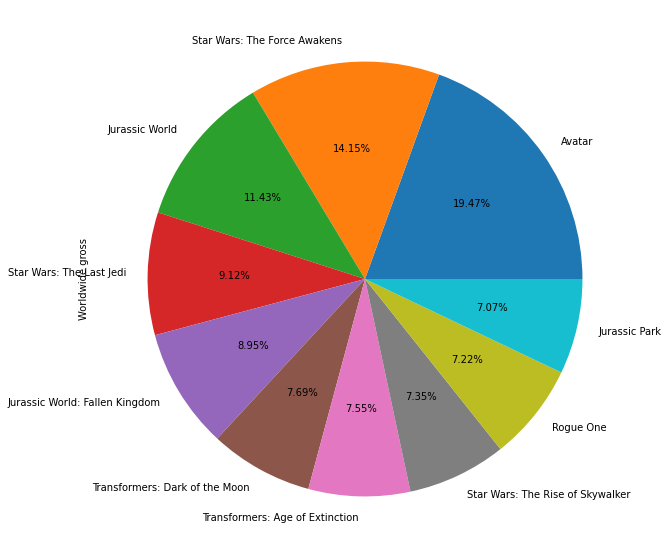

In [ ]:

df20['Worldwide gross'].head(10).plot(kind = 'pie', autopct = '%.2f%%', labels = df20['Film'],
                                      figsize = (10, 10), legend = False)

In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Film             50 non-null     object        
 1   Worldwide gross  50 non-null     int64         
 2   Year             50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
sns.set_theme(style="white")
sns.relplot(x="Year", y="Worldwide gross", hue='Film',
            sizes=(40, 400), palette="muted",
            height=6, data=df20.head(40))


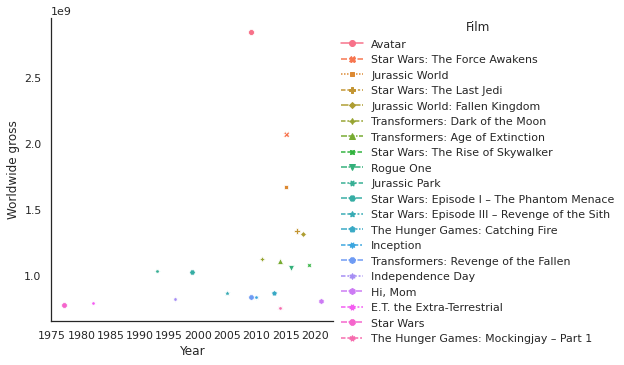

In [ ]:
sns.relplot(x="Year", y="Worldwide gross", kind="line", ci=None,  
            sizes=(90, 90),  hue="Film", style="Film",
    markers=True, dashes=True,   
             data=df20.head(20))
# На данном графике мы можем увидеть в каком году был самый кассовый фильм

# **Case study 2: Use of data analysis for air quality management**

Для мониторинга состояния качества атмосферного воздуха Центральный совет по контролю за загрязнением (ЦCКЗ) Индии управляет обширной сетью станций мониторинга, разбросанных по всей стране. Регулярно контролируемые параметры включают диоксид серы (SO2), оксиды азота в виде диоксида азота (NO2), озон и мелкие твердые частицы (PM2,5). Основываясь на тенденциях на протяжении многих лет, качество воздуха в столице страны Дели стало предметом озабоченности общественности.
Далее следует пошаговый анализ ежедневных данных о качестве воздуха, чтобы продемонстрировать, как анализ данных может помочь в планировании мероприятий в рамках управления качеством воздуха.
**Примечание.** Набор данных, использованный для этого тематического исследования, называется **«NSIT Dwarka.csv»**. Пожалуйста, обратитесь к разделу технического описания для получения подробной информации о том, как импортировать этот набор данных.

Вопросы, на которые мы хотим ответить с помощью нашего анализа:
 1. Среднегодовые значения: из четырех загрязнителей - SO2, NO2, озона и PM2,5 - среднегодовые уровни которых регулярно превышают установленные годовые нормы?
 2. Суточные нормы. В отношении загрязнителей, какое количество дней в году дневные нормы превышаются?
 3. Временные колебания. В какие месяцы уровни загрязнения превышают критические уровни в большинстве дней?

# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NSIT Dwarka.csv to NSIT Dwarka (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#aqdata is the name of the DataFrame, short for Air Quality Data.
aqdata=pd.read_csv('NSIT Dwarka.csv')
aqdata.head()

,From Date,To Date,PM2.5,SO2,Ozone,NO2
0,01-01-2014 00:00,02-01-2014 00:00,None,22.7,8.63,5.59
1,02-01-2014 00:00,03-01-2014 00:00,None,8.72,8.43,3.68
2,03-01-2014 00:00,04-01-2014 00:00,None,13.83,9.77,3.83
3,04-01-2014 00:00,05-01-2014 00:00,None,27.64,6.83,9.64
4,05-01-2014 00:00,06-01-2014 00:00,None,37.17,7.34,11.06


Проверка типов данных столбцов:

In [ ]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2191 non-null   object
 1   To Date    2191 non-null   object
 2   PM2.5      2191 non-null   object
 3   SO2        2187 non-null   object
 4   Ozone      2187 non-null   object
 5   NO2        2190 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


Наблюдение: хотя значения SO2, NO2, озона и PM2,5 являются числовыми, Pandasсчитывает тип данных этих столбцов как «объект». Для работы с этими столбцами (т. Е. Построить график графики, наблюдать за тенденциями, рассчитывать агрегированные значения), нам нужно изменить типы данных
эти столбцы. Кроме того, похоже, есть некоторые недостающие записи.

# **Шаг 2. Обработка данных**

Основываясь на наблюдениях на предыдущем шаге, на этом шаге мы будем
  1. Работать с пропущенными значениями. У нас есть возможность отказаться от нулевые значения или замена нулевых значений.
  2. Изменение типа данных для столбцов.

Проверим наличие отсутствующих значений в наборе данных:

In [ ]:
aqdata.isna().sum()

Кажется, что пропущенных значений не так много, но в этом и заключается загвоздка. Когда мы проверив первые несколько строк с помощью оператора head, мы увидели, что некоторые пропущенные значения представлены как **None **в исходном наборе данных. Однако они не признаются как нулевые значения от Pandas. Заменим значение **None** значением **np.nan**, чтобы **Pandas** признает эти значения как нулевые значения:

In [ ]:
aqdata = aqdata.replace({'None':np.nan})

In [ ]:
aqdata.isna().sum()

From Date      1
To Date        1
PM2.5        562
SO2           84
Ozone        106
NO2          105
dtype: int64

In [ ]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2191 non-null   object
 1   To Date    2191 non-null   object
 2   PM2.5      1630 non-null   object
 3   SO2        2108 non-null   object
 4   Ozone      2086 non-null   object
 5   NO2        2087 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


Мы видим, что столбцы, содержащие числовые значения, не распознаются как числовые столбцы, а столбцы, содержащие даты, также не распознаются правильно. Имея столбцы с неправильными типами данных становятся препятствием для следующего шага, на котором мы анализировать тенденции и строить графики; этот шаг требует, чтобы типы данных столбцов были в
формате, подходящем для чтения. В следующих строках кода мы используем метод ***pd.to_datetime*** для преобразования типа данных.
столбцов «From Date» и «To Date» к типу datetime, что упрощает
анализируйте отдельные компоненты даты, такие как месяцы и годы.

In [ ]:
aqdata['From Date'] = pd.to_datetime(aqdata['From Date'], format = '%d-%m-%Y %H:%M')
aqdata['To Date'] = pd.to_datetime(aqdata['To Date'], format = '%d-%m-%Y %H:%M')
aqdata['SO2'] = pd.to_numeric(aqdata['SO2'], errors = 'coerce')
aqdata['NO2'] = pd.to_numeric(aqdata['NO2'], errors = 'coerce')
aqdata['Ozone'] = pd.to_numeric(aqdata['Ozone'], errors = 'coerce')
aqdata['PM2.5'] = pd.to_numeric(aqdata['PM2.5'], errors = 'coerce')

In [ ]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  2191 non-null   datetime64[ns]
 1   To Date    2191 non-null   datetime64[ns]
 2   PM2.5      1630 non-null   float64       
 3   SO2        2108 non-null   float64       
 4   Ozone      2086 non-null   float64       
 5   NO2        2087 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 102.9 KB


Поскольку большая часть нашего анализа рассматривает годовые данные, мы создаем новый столбец для извлечения
года, используя функцию **pd.DatetimeIndex**.

In [ ]:
aqdata['Year'] = pd.DatetimeIndex(aqdata['From Date']).year

In [ ]:
#extracting the data for each year
aq2014 = aqdata[aqdata['Year'] ==2014]
aq2015 = aqdata[aqdata['Year'] ==2015]
aq2016 = aqdata[aqdata['Year'] ==2016]
aq2017 = aqdata[aqdata['Year'] ==2017]
aq2018 = aqdata[aqdata['Year'] ==2018]
aq2019 = aqdata[aqdata['Year'] ==2019]


Теперь давайте посмотрим на количество нулевых значений в данных за каждый год:

In [ ]:
aq2014.isna().sum()

From Date      0
To Date        0
PM2.5        365
SO2            8
Ozone          8
NO2            8
Year           0
dtype: int64

In [ ]:
aq2015.isna().sum()

From Date      0
To Date        0
PM2.5        117
SO2           12
Ozone         29
NO2           37
Year           0
dtype: int64

In [ ]:
aq2016.isna().sum()

From Date     0
To Date       0
PM2.5        43
SO2          43
Ozone        47
NO2          42
Year          0
dtype: int64

In [ ]:
aq2017.isna().sum()

From Date     0
To Date       0
PM2.5        34
SO2          17
Ozone        17
NO2          12
Year          0
dtype: int64

In [ ]:
aq2018.isna().sum()

In [ ]:
aq2019.isna().sum()

Из анализа нулевых значений для каждого года мы видим, что данные за 2014 и
2015 имеют большинство недостающих значений. Следовательно, мы предпочитаем игнорировать данные из
2014 и 2015 годы, и проанализировать данные за 4 года с 2016 по 2019 год. В соответствии с нормами установлено Центральным советом по контролю за загрязнением, Индия, нам необходимо ежедневно контролировать не менее 104
значения для получения среднегодовых значений.
2016, 2017, 2018 и 2019 - это четыре года, за которые будут собираться данные о качестве воздуха. Прежде чем перейти к следующему шагу, мы отбрасываем недостающие значения для каждого года. с 2016 по 2019 год вместо их замены, поскольку у нас достаточно данных (более104 показаний) для каждого из этих четырех лет, чтобы рассчитать среднегодовые значения, как показано ниже.

In [ ]:
aq2016.dropna(inplace = True)
aq2017.dropna(inplace = True)
aq2018.dropna(inplace = True)
aq2019.dropna(inplace = True)


# **Шаг 3: Визуализация**

In [ ]:
Часть 1 анализа: построение среднегодовых значений загрязняющих веществ.
На основе данных мониторинга средних 24-часовых концентраций в атмосферном воздухе PM2,5, SO2,
NO2 и озон (O3), среднегодовые значения наносятся на график для определения параметров, для которых
установленные национальные стандарты качества атмосферного воздуха для среднегодовых превышений.
Сначала мы рассчитываем среднегодовые значения для каждого загрязнителя (PM2,5, SO2, NO2 и озон), как
следует:

In [ ]:
#Yearly averages for SO2 in each year
s16avg = round(aq2016['SO2'].mean(), 2)
s17avg = round(aq2017['SO2'].mean(), 2)
s18avg = round(aq2018['SO2'].mean(), 2)
s19avg = round(aq2019['SO2'].mean(), 2)

#Yearly averages for PM2.5 in each year
p16avg = round(aq2016['PM2.5'].mean(), 2)
p17avg = round(aq2017['PM2.5'].mean(), 2)
p18avg = round(aq2018['PM2.5'].mean(), 2)
p19avg = round(aq2019['PM2.5'].mean(), 2)

#Yearly averages for NO2 in each year
n16avg = round(aq2016['NO2'].mean(), 2)
n17avg = round(aq2017['NO2'].mean(), 2)
n18avg = round(aq2018['NO2'].mean(), 2)
n19avg = round(aq2019['NO2'].mean(), 2)

Пояснение: Обозначения для именования переменных, представляющих средние значения загрязняющих веществ. выглядит следующим образом: первая буква загрязнителя, год и сокращение «avg» для в среднем. Например, s15avg обозначает средний уровень SO2 в 2015 году. Мы используем метод вычисления среднего и функция округления для округления среднего значение до двух десятичных знаков. Мы не рассматриваем озон, поскольку годовые стандарты не учитываются. применимо к озону. Затем мы создаем DataFrame для каждого загрязнителя с двумя столбцами в каждом. Один из столбцы представляют год, а другой столбец показывает средний годовой уровень для этот год.

In [ ]:
dfs = pd.DataFrame({'Yearly average': [s16avg, s17avg, s18avg, s19avg]}, index = ['2016', '2017', '2018', '2019'])
dfp = pd.DataFrame({'Yearly average': [p16avg, p17avg, p18avg, p19avg]}, index = ['2016', '2017', '2018', '2019'])
dfn = pd.DataFrame({'Yearly average': [n16avg, n17avg, n18avg, n19avg]}, index = ['2016', '2017', '2018', '2019'])

In [ ]:
#Creating a figure with 3 subplots - 1 for each pollutant
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
#Creating a DataFrame the yearly averages for NO2
dfn.plot(kind='bar',figsize=(20,5),ax=ax1)
#Setting the title for the first axes object
ax1.set_title("NO2", fontsize=18)
#Setting the X-axis label for the NO2 graph
ax1.set_xlabel("Years", fontsize=18)
ax1.legend().set_visible(False)
#Setting the Y-axis label
ax1.set_ylabel("Yearly average", fontsize=18)
#Creating a dashed line to indicate the annual standard
ax1.hlines(40, -.9,15, linestyles="dashed")
#Labelling this dashed line
ax1.annotate('Annual avg. standard for NO2',(-0.5,38))
#labelling the bars
for p in ax1.patches:
    ax1.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), color="black", ha="left", va ='bottom',fontsize=12)
#Plotting the yearly averages similarly for PM2.5
dfp.plot(kind='bar',figsize=(20,5),ax=ax2)
ax2.set_title("PM2.5", fontsize=18)
ax2.hlines(40, -.9,15, linestyles="dashed")
ax2.annotate('Annual avg. standard for PM2.5',(-0.5,48))
ax2.legend().set_visible(False)
for p in ax2.patches:
    ax2.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), color="black", ha="center", va ='bottom',fontsize=12)
#Plotting the yearly averages similarly for SO2
dfs.plot(kind='bar',figsize=(20,5),ax=ax3)
ax3.hlines(50, -.9,15, linestyles="dashed")
ax3.annotate('Annual avg. standard for SO2',(-0.5,48))
ax3.set_title("SO2", fontsize=18)
ax3.legend().set_visible(False)
for p in ax3.patches:
    ax3.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), color="black", ha="center", va ='bottom',fontsize=12)

Наблюдение: очевидно, что среднегодовые нормы превышаются только для PM2,5. Для NO2 наблюдаемые значения относительно близки к предписанному стандарту. Для SO2 наблюдаемые значения намного меньше годовой нормы. Поэтому для дальнейшего анализа учитываются только эти два загрязнителя (NO2 и PM2,5)

**Часть 2 анализа качества воздуха: график количества дней в году, когда 24 часа в сутки превышены нормы для PM2,5 и NO2**
В то время как на этапе 1 анализа указываются загрязнители, вызывающие озабоченность с точки зрения управления качеством воздуха. и планирование вмешательств, на шаге 2, на каждый год, мы показываем, как различные уровни превышение нормативов для суточных значений распределяется. В случае PM2,5 мы нанесите на график количество дней в году, для которых наблюдаемые значения попадают в следующие диапазоны. а. От 0 до 60 мкг / м3 б. От 61 до 120 мкг / м3 c. От 121 до 180 мкг / м3 d. > 180 мкг / м3 Чтобы построить эти данные, нам нужно создать объекты DataFrame для каждого года с 2016 по 2019 год. фиксирование количества дней, в течение которых уровни PM2,5 падали в каждом из этих интервалов, как показано В следующих:

In [ ]:
#Creating intervals for 2016 with the number of days with PM2.5  concentration falling in that interval
a2=aq2016[(aq2016['PM2.5']<=60)]['PM2.5'].count()
b2=aq2016[((aq2016['PM2.5']>60) & (aq2016['PM2.5']<=120))]['PM2.5'].count()
c2=aq2016[((aq2016['PM2.5']>120) & (aq2016['PM2.5']<=180))]['PM2.5'].count()
d2=aq2016[(aq2016['PM2.5']>180)]['PM2.5'].count()
dfpb2016=pd.DataFrame({'year':'2016','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],'number of critical days':[a2,b2,c2,d2]})
#Creating intervals for 2017 with the number of days with PM2.5  concentration falling in each interval
a3=aq2017[(aq2017['PM2.5']<=60)]['PM2.5'].count()
b3=aq2017[((aq2017['PM2.5']>60) & (aq2017['PM2.5']<=120))]['PM2.5'].count()
c3=aq2017[((aq2017['PM2.5']>120) & (aq2017['PM2.5']<=180))]['PM2.5'].count()
d3=aq2017[(aq2017['PM2.5']>180)]['PM2.5'].count()
dfpb2017=pd.DataFrame({'year':'2017','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],'number of critical days':[a3,b3,c3,d3]})
#Creating intervals for 2018 with the number of days with PM2.5  concentration falling in each interval
a4=aq2018[(aq2018['PM2.5']<=60)]['PM2.5'].count()
b4=aq2018[((aq2018['PM2.5']>60) & (aq2018['PM2.5']<=120))]['PM2.5'].count()
c4=aq2018[((aq2018['PM2.5']>120) & (aq2018['PM2.5']<=180))]['PM2.5'].count()
d4=aq2018[(aq2018['PM2.5']>180)]['PM2.5'].count()
dfpb2018=pd.DataFrame({'year':'2018','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],'number of critical days':[a4,b4,c4,d4]})
#Creating intervals for 2019 with the number of days with PM2.5 concentration falling in each interval
a5=aq2019[(aq2019['PM2.5']<=60)]['PM2.5'].count()
b5=aq2019[((aq2019['PM2.5']>60) & (aq2019['PM2.5']<=120))]['PM2.5'].count()
c5=aq2019[((aq2019['PM2.5']>120) & (aq2019['PM2.5']<=180))]['PM2.5'].count()
d5=aq2019[(aq2019['PM2.5']>180)]['PM2.5'].count()
dfpb2019=pd.DataFrame({'year':'2019','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],'number of critical days':[a5,b5,c5,d5]})

Теперь мы строим столбчатую диаграмму с накоплением для каждого года с этими интервалами. Для этого нам нужно создать сводные таблицы следующим образом:

In [ ]:
dfpivot2019=dfpb2019.pivot(index='year', columns='pm levels', values='number of critical days') 
dfpivot2018=dfpb2018.pivot(index='year', columns='pm levels', values='number of critical days') 
dfpivot2017=dfpb2017.pivot(index='year', columns='pm levels', values='number of critical days') 
dfpivot2016=dfpb2016.pivot(index='year', columns='pm levels', values='number of critical days')

Text(0.5, 1.0, '2016')

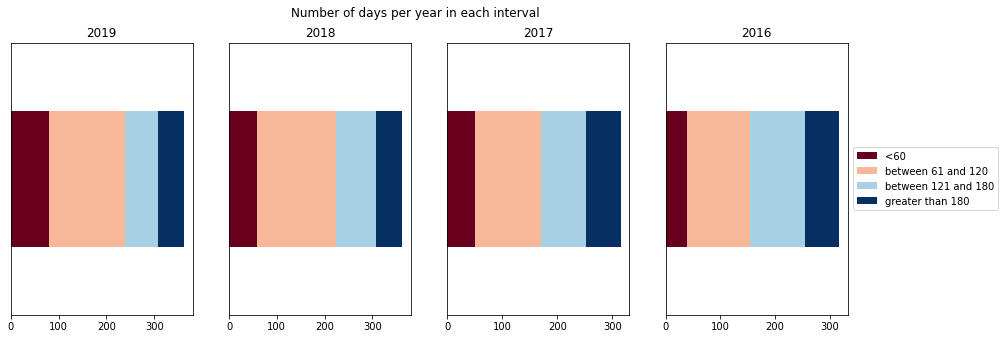

In [ ]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4)
fig.suptitle("Number of days per year in each interval")
cmp=plt.cm.get_cmap('RdBu')
#Plotting stacked horizontal bar charts for each year to represent intervals of PM2.5 levels
dfpivot2019.loc[:,['<60','between 61 and 120','between 121 and 180', 'greater than 180']].plot.barh(stacked=True, cmap=cmp,figsize=(15,5),ax=ax1)
dfpivot2018.loc[:,['<60','between 61 and 120','between 121 and 180','greater than 180']].plot.barh(stacked=True, cmap=cmp,figsize=(15,5),ax=ax2)
dfpivot2017.loc[:,['<60','between 61 and 120','between 121 and 180','greater than 180']].plot.barh(stacked=True, cmap=cmp, figsize=(15,5),ax=ax3)
dfpivot2016.loc[:,['<60','between 61 and 120','between 121 and 180','greater than 180']].plot.barh(stacked=True, cmap=cmp, figsize=(15,5),ax=ax4)
#Setting the properties - legend, yaxis and title
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax4.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax1.set_title('2019')
ax2.set_title('2018')
ax3.set_title('2017')
ax4.set_title('2016')

Наблюдение: очевидно, что среднегодовые нормы превышаются только для PM2,5.
Для NO2 наблюдаемые значения относительно близки к предписанному стандарту. Для SO2 наблюдаемые значения намного меньше годовой нормы. Поэтому для дальнейшего анализа учитываются только эти два загрязнителя (NO2 и PM2,5)

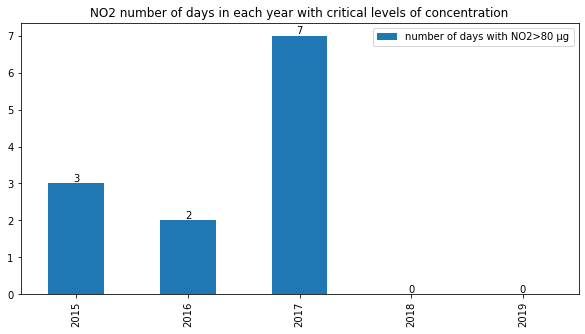

In [ ]:
a = aq2015[(aq2015['NO2']>=80)]['NO2'].count()
b = aq2016[(aq2016['NO2']>=80)]['NO2'].count()
c = aq2017[(aq2017['NO2']>=80)]['NO2'].count()
d = aq2018[(aq2018['NO2']>=80)]['NO2'].count()
e = aq2019[(aq2019['NO2']>=80)]['NO2'].count()

dfno=pd.DataFrame({'years':['2015','2016','2017','2018','2019'],'number of days with NO2>80 μg':[a,b,c,d,e]}) 
ax = dfno.plot(kind = 'bar', figsize = (10,5))
ax.set_xticklabels(['2015','2016','2017','2018','2019']) 
ax.set_title("NO2 number of days in each year with critical levels of concentration") 

for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), ha="center", va ='bottom')

Вывод: наблюдаемые суточные значения NO2 превышаются только в течение трех из пяти лет. Поскольку наблюдаемые суточные значения NO2 превышают стандартные лишь незначительно и только в течение нескольких дней, следующий шаг ограничен дальнейшим анализом PM2,5. Часть 3 анализа качества воздуха: Определение месяцев, в которые суточные значения PM2,5 превышают критические уровни в большинстве дней Перед введением ограничений на такие виды деятельности, как движение транспортных средств и строительство, которые вносят значительный вклад в концентрации PM2,5 в окружающей среде, необходимо: предоставлять достаточное уведомление, чтобы избежать неудобств для широкой публики. Следовательно, для суточных значений PM2,5, значительно превышающих 180 мкг / м3, мы наносим график изменения во времени по годам в течение каждого месяца в году. Для этого для каждого из двенадцати месяцев мы фиксируем количество дней с критическим загрязнением воздуха каждый год с суточными значениями PM2,5, превышающими 180 мкг / м3. Сначала мы создаем кадры данных для каждого года с количеством дней в каждом месяце, когда значения PM2,5 превышают 180 мкг / м3, как показано ниже.

In [ ]:
#Creating a dataframe for 2016 with the number of days in each month where the PM2.5 concentration is >180
aq2016['Month']=pd.DatetimeIndex(aq2016['From Date']).month #extracting the month
aq2016['condition']=(aq2016['PM2.5']>=180 ) # creating a boolean columnthat is True when the PM2.5 value is greater than 180 and false when it is less than 180
aq2016['condition']=aq2016['condition'].replace({False:np.nan}) # replacing the False values with null values, so that the count method in the next statement only counts the True values or the values corresponding to PM 2.5>180
selection1=aq2016.groupby('Month')['condition'].count() #Using the groupby method to calculate the number of days for each month that satisfy the condition(PM2.5>180)
#Repeating the above process for 2017, creating a dataframe with the number of days in each month where the PM2.5 concentration is >180
aq2017['Month']=pd.DatetimeIndex(aq2017['From Date']).month
aq2017['condition']=(aq2017['PM2.5']>=180 )
aq2017['condition']=aq2017['condition'].replace({False:np.nan})
selection2=aq2017.groupby('Month')['condition'].count()
#Repeating the above process for 2018, creating a dataframe with the number of days in each month where the PM2.5 concentration is >180
aq2018['Month']=pd.DatetimeIndex(aq2018['From Date']).month
aq2018['condition']=(aq2018['PM2.5']>=180 )
aq2018['condition']=aq2018['condition'].replace({False:np.nan})
selection3=aq2018.groupby('Month')['condition'].count()
#Repeating the above process for 2019, creating a dataframe with the number of days in each month where the PM2.5 concentration is >180
aq2019['Month']=pd.DatetimeIndex(aq2019['From Date']).month
aq2019['condition']=(aq2019['PM2.5']>=180 )
aq2019['condition']=aq2019['condition'].replace({False:np.nan})
selection4=aq2019.groupby('Month')['condition'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Теперь мы объединяем все объекты DataFrame в один объект (который мы назовем ‘Selectionc’), чтобы получить сводную картину количества дней в каждом месяце, когда PM2,5> 180 мкг / м3, как показано ниже.

In [ ]:
selectionc = pd.concat([selection1, selection2, selection3, selection4], axis = 1)
selectionc.columns = ['2016', '2017', '2018', '2019']

Мы можем наблюдать из этой таблицы, что месяц 1 (январь), месяц 11 (ноябрь) и
12-й месяц (декабрь) - самые критические месяцы за все четыре года, так как эти месяцы было наибольшее количество дней с PM2,5> 180 мкг / м3.
Теперь, когда у нас есть все данные, давайте визуализируем критические дни для PM2,5. (Рисунок 8-7), используя следующий код.

In [ ]:
#creating a bar chart representing number of days with critical levels of PM2.5(>180) concentrations
ax=selectionc.plot(kind='bar',figsize=(20,7),width=0.7,align='center',colormap='Paired')
bars = ax.patches
#creating patterns to represent each year
patterns =('-','x','/','O')
#ax.legend(loc='upper left', borderpad=1.5, labelspacing=1.5)
ax.legend((patterns),('2016','2017','2018','2019'))
hatches = [p for p in patterns for i in range(len(selectionc))]
#setting a pattern for each bar
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
#Labelling the months, the X axis and Y axis
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],rotation=30)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Number of days with critical levels of PM2.5',fontsize=12)
#Labelling the bars
for i in ax.patches:
    ax.text(i.get_x()-.003, i.get_height()+.3,
            round(i.get_height(),2), fontsize=10,
                color='dimgrey')
ax.legend()
ax.set_title("Number of days with critical levels of PM2.5 in each month of years 2016-19")

# **Case study 3: Worldwide COVID-19 cases – an analysis**

Вопросы, на которые необходимо ответить с помощью анализа, включают:
1.   В каких странах самый низкий уровень смертности, максимум случаев и больше всего погибших?
2.   Какова месячная тенденция по количеству случаев и погибших с начала пандемии?
3. В некоторых странах были введены ограничения, чтобы помочь сгладить кривую. Помогла ли эта мера снизить количество заболевших?

# **Шаг 1.** Импорт данных и изучение характеристик набора данных

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx to COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx


Прочтите набор данных и изучите первые пять строк (используя метод head) с помощью файла pd.read_excel:

In [ ]:
dfCov = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx')
dfCov.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia


Получите информацию о типе данных каждого столбца и количестве ненулевых значений в каждом столбце (используя метод **info**).

In [ ]:
dfCov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26562 entries, 0 to 26561
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  26562 non-null  datetime64[ns]
 1   day                      26562 non-null  int64         
 2   month                    26562 non-null  int64         
 3   year                     26562 non-null  int64         
 4   cases                    26562 non-null  int64         
 5   deaths                   26562 non-null  int64         
 6   countriesAndTerritories  26562 non-null  object        
 7   geoId                    26455 non-null  object        
 8   countryterritoryCode     26498 non-null  object        
 9   popData2019              26498 non-null  float64       
 10  continentExp             26562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.2+ MB


Получите сводную статистику для каждого столбца (используя метод описания) и получите значения **count, min, max, стандартное отклонение и процентиль**:

In [ ]:
dfCov.describe()

,day,month,year,cases,deaths,popData2019
count,26562.000000,26562.000000,26562.000000,26562.000000,26562.000000,2.649800e+04
mean,16.207929,4.194790,2019.997478,380.722611,18.882690,4.689196e+07
std,8.745421,1.555569,0.050161,2172.430663,121.386696,1.675462e+08
min,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,8.150000e+02
25%,9.000000,3.000000,2020.000000,0.000000,0.000000,1.919968e+06
50%,17.000000,4.000000,2020.000000,4.000000,0.000000,8.776119e+06
75%,24.000000,5.000000,2020.000000,68.000000,1.000000,3.194979e+07
max,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09


# Шаг 2. Обработка данных

На этом этапе выполним: • Проверку: правильно ли определены типы данных столбцов. Если нет, изменить типы данных: из вывода информационного метода мы видим, что все типы данных столбцов были правильно идентифицированы. • При необходимости переименовать столбцы: в следующем коде переименовываем столбцы DataFrame.

In [ ]:
dfCov.columns=['date', 'day', 'month', 'year', 'cases', 'deaths', 'country', 'old_country_code', 'country_code', 'population', 'continent']

Отбросьте ненужные столбцы или строки: • Мы видим, что столбец кода страны присутствует дважды (с двумя разными именами: '**old_country_code**' и '**country_code**') в DataFrame, поэтому мы удаляем один из столбцов (**«old_country_code»**):

In [ ]:
dfCov.drop(['old_country_code'],axis=1,inplace=True)

Удалить все лишние данные, которые не добавляют никакой ценности: В этом DataFrame нет пробелов, специальных символов или любых других посторонних символов. Мы видим, что есть данные только за один день декабря 2019 года; поэтому мы удаляем данные за этот месяц и создаем новый DataFrame (df1) на оставшиеся 11 месяцев.

In [ ]:
df3 = dfCov[dfCov.month!=12]

Проверьте, есть ли какие-либо нулевые значения, используя метод **isna** или **isnull**, и примените соответствующие методы для работы с ними, если они есть: Расчет процента нулевых значений:

In [ ]:
df3.isna().sum().sum()/len(df3)

0.0

Поскольку процент нулевых значений меньше 1%, мы отбрасываем нулевые значения на следующем шаге.

In [ ]:
df3.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
26557,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26558,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
26559,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26560,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [ ]:
df3.isna().sum().sum()/len(df3)

0.0

**Агрегируем данные**,

если данные находятся в этом формате формате: данные в этом DataFrame не в агрегированном формате, и мы преобразуем их в этот формат с помощью метода **groupby** на этом этапе. Мы можем группировать по странам, континентам или по дате. Сгруппируем по названию страны.

In [ ]:
dfCov_by_country=dfCov.groupby('country')['cases', 'deaths'].sum()
dfCov_by_country

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
country,,
Afghanistan,30967,721
Albania,2402,55
Algeria,13273,897
Andorra,855,52
Angola,267,11
...,...,...
Vietnam,355,0
Western_Sahara,208,1
Yemen,1118,302


Предыдущие выходные данные показывают консолидированную картину количества случаев заболевания и смертей по каждой стране.

Давайте добавим еще один столбец в этот агрегированный DataFrame - коэффициент смертности, который представляет собой отношение количества смертей к количеству случаев.

In [ ]:
dfCov_by_country['mortality_rate']=dfCov_by_country['deaths']/dfCov_by_country['cases']
dfCov_by_country

# **Шаг 3: Визуализация данных**

В первой визуализации этого исследования используем агрегированные данные в DataFrame, «df_by_country», для отображения двадцати стран с наибольшим уровнем смертности.

In [ ]:
plt.figure(figsize=(15,10))
ax=dfCov_by_country['mortality_rate'].sort_values(ascending=False).head(20).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
  ax.annotate(p.get_height().round(2),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')
ax.set_xlabel("Country")
ax.set_ylabel("Mortality rate")
ax.set_title("countries with highest mortality rates")

Во второй визуализации мы отображаем десять стран с наибольшим количеством случаев COVID-19, используя круговую диаграмму, как показано на рисунке ниже.

In [ ]:
dfCov_cases=dfCov_by_country['cases'].sort_values(ascending=False)
ax=dfCov.cases.head(10).plot(kind='pie',autopct='%.2f%%',labels=dfCov_cases.index,figsize=(12,8))
ax.set_title("Top ten countries by case load")

В следующей визуализации с помощью гистограммы выясняем пять стран, которые больше всего пострадали с точки зрения человеческих потерь в результате пандемии COVID-19.

In [ ]:
plt.figure(figsize=(10,6))
ax=dfCov_by_country['deaths'].sort_values(ascending=False).head(5).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')
  ax.set_title("countries suffering from COVID")
ax.set_xlabel("Country")
ax.set_ylabel("Number of deaths")

# **Шаг 4:** Построение выводов на основе анализа и визуализаций

Количество случаев: наибольшее количество случаев зарегистрировано в США, Бразилии, России, Индии и Великобритании. • Количество смертей: США, Бразилия, Великобритания, Италия и Франция имели самые высокие показатели смертности. Уровень смертности: Йемен, Сен-Мартен, Франция, Бельгия и Италия имели самые высокие показатели смертности. • Тенденции: • Общее количество заболевших неуклонно растет, в то время как общее количество смертей (смертей) снизилось после Апреля. • Влияние локдауна: мы проанализировали четыре страны - Индию, Великобританию, Германию и Италию - где в марте были введенлокдаун. За исключением Индии, во всех этих странах наблюдалось общее снижение числа случаев после введения карантина. В Великобритании и Германии число случаев заболевания сначала увеличилось (на ранней стадии закрытия стран), но после этого всплеска стало снижаться.

# Задание 1

Рассмотрим первую таблицу на следующей веб-странице: https://en.wikipedia.org/wiki/Climate_of_South_Africa. Она содержит данные о максимальных и минимальных температурах (в градусах Цельсия) в различных городах Южной Африки летом и зимой.
Используйте соответствующий метод из модуля запросов, чтобы отправить запрос на получение по этому URL-адресу и сохранить данные из первой таблицы на этой странице в фрейме данных Pandas.
Переименуйте столбцы следующим образом: 'City', 'Summer(max)', 'Summer(min)', 'Winter(max)', 'Winter(min)' .
Замените отрицательное значение в первой строке столбца ‘Winter(min)’ на 0 и преобразуйте тип данных этого столбца в int64.
Постройте график для отображения самых жарких городов в Южной Африке летом (используйте столбец Summer(max)).
Постройте график для отображения самых холодных городов в Южной Африке зимой (используйте столбец Winter(min)).

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/Climate_of_South_Africa'
req=requests.get(url)
data=pd.read_html(req.text)
df1=data[0]

***Анализируем данные***

In [ ]:
df1.head()

City Summer(January)     Winter(July)    
           City             Max Min          Max Min
0  Bloemfontein              29  15           15  –2
1     Cape Town              26  16           16   7
2        Durban              28  21           23  11
3   East London              26  18           19  10
4        George              25  15           15   7

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   (City, City)            18 non-null     object
 1   (Summer(January), Max)  18 non-null     int64 
 2   (Summer(January), Min)  18 non-null     int64 
 3   (Winter(July), Max)     18 non-null     int64 
 4   (Winter(July), Min)     18 non-null     object
dtypes: int64(3), object(2)
memory usage: 848.0+ bytes


In [ ]:
df1.head()

City Summer(January)     Winter(July)    
           City             Max Min          Max Min
0  Bloemfontein              29  15           15  –2
1     Cape Town              26  16           16   7
2        Durban              28  21           23  11
3   East London              26  18           19  10
4        George              25  15           15   7

*Переименуем столбцы*

In [ ]:
df1.columns = ['City', 'Summer(max)', 'Summer(min)', 'Winter(max)', 'Winter(min)']

In [ ]:
df1

,City,Summer(max),Summer(min),Winter(max),Winter(min)
0,Bloemfontein,29,15,15,–2
1,Cape Town,26,16,16,7
2,Durban,28,21,23,11
3,East London,26,18,19,10
4,George,25,15,15,7
5,Johannesburg,26,15,17,4
6,Kimberley,33,18,19,3
7,Mthatha,27,16,21,4
8,Musina,34,21,25,7
9,Nelspruit,29,19,23,6


In [ ]:
df1.iloc[0, df1.columns.get_loc('Winter(min)')] = 0
df1['Winter(min)'] = df1['Winter(min)'].astype('int64')
df1

,City,Summer(max),Summer(min),Winter(max),Winter(min)
0,Bloemfontein,29,15,15,0
1,Cape Town,26,16,16,7
2,Durban,28,21,23,11
3,East London,26,18,19,10
4,George,25,15,15,7
5,Johannesburg,26,15,17,4
6,Kimberley,33,18,19,3
7,Mthatha,27,16,21,4
8,Musina,34,21,25,7
9,Nelspruit,29,19,23,6


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City         18 non-null     object
 1   Summer(max)  18 non-null     int64 
 2   Summer(min)  18 non-null     int64 
 3   Winter(max)  18 non-null     int64 
 4   Winter(min)  18 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 848.0+ bytes


Text(0.5, 1.0, 'The hotest city in South Africa')

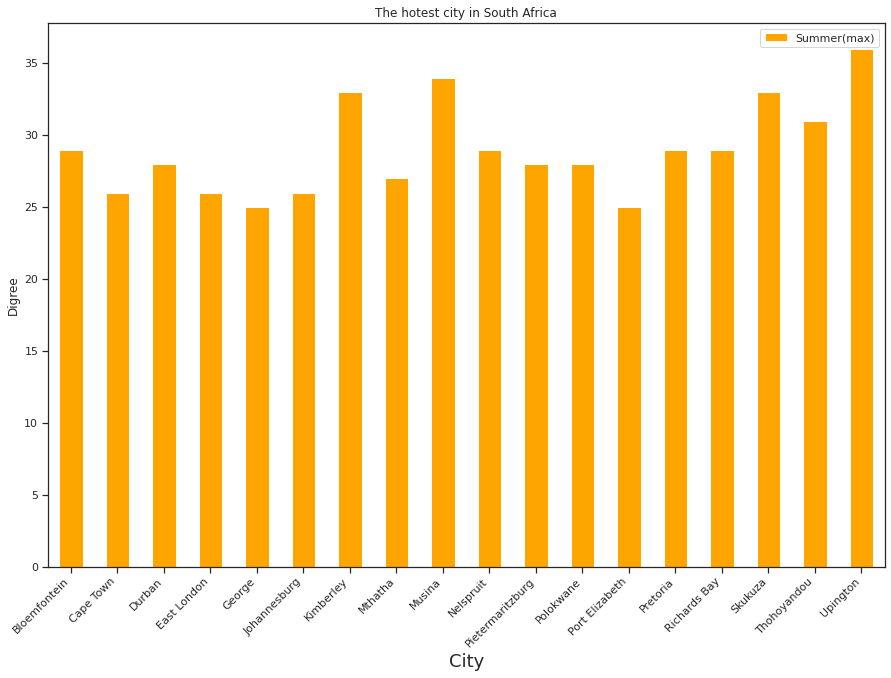

In [ ]:
plt.figure(figsize=(15,10))
ax = df1['Summer(max)'].plot(kind='bar', color = 'orange')
ax.set_xticklabels(labels = df1['City'], rotation=45, ha="right")
ax.set_xlabel("City", fontsize=18)
ax.legend().set_visible(True)
ax.set_ylabel("Digree")
ax.set_title("The hotest city in South Africa")

Text(0.5, 1.0, 'The coldest city in South Africa')

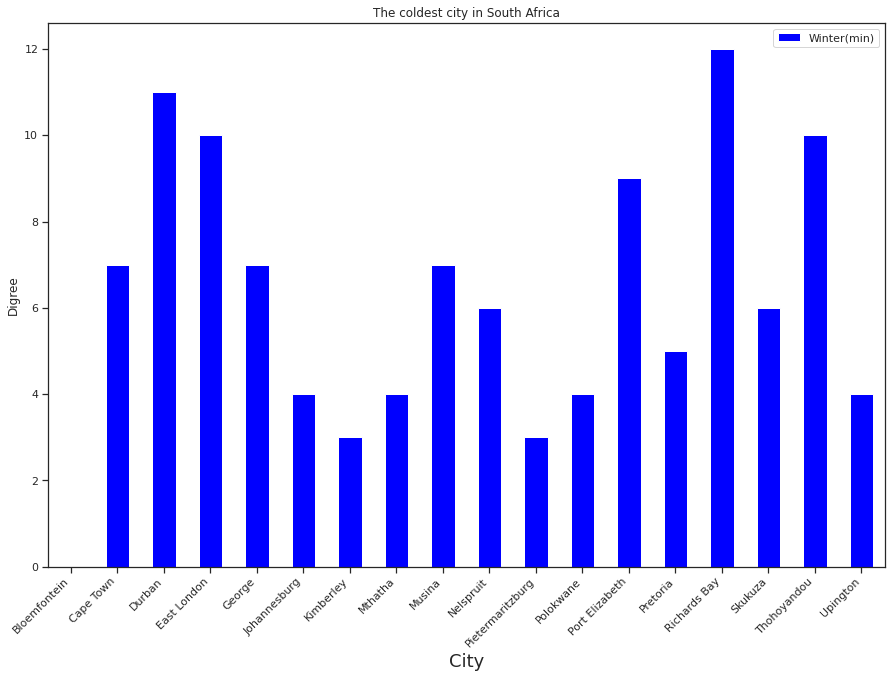

In [ ]:
plt.figure(figsize=(15,10))
ax=df1['Winter(min)'].plot(kind='bar', color = 'blue')
ax.set_xticklabels(labels = df1['City'], rotation=45, ha="right")
ax.set_xlabel("City", fontsize=18)
ax.legend().set_visible(True)
ax.set_ylabel("Digree")
ax.set_title("The coldest city in South Africa")

# Задание 2

Недельная заработная плата десяти сотрудников (с инициалами A – J) составляет: 100, 120, 80, 155, 222, 400, 199, 403, 345, 290. Сохраните недельную заработную плату в DataFrame.
• Постройте гистограмму для отображения заработной платы в убывающем порядке.
• Обозначьте каждую полосу на гистограммах с помощью метода аннотации.

In [ ]:
data = {'worker' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'weekly salary' : [100, 120, 80, 155, 222, 400, 199, 403, 345, 290]}
frame = pd.DataFrame(data)
frame        

,worker,weekly salary
0,A,100
1,B,120
2,C,80
3,D,155
4,E,222
5,F,400
6,G,199
7,H,403
8,I,345
9,J,290


In [ ]:
frame.info()

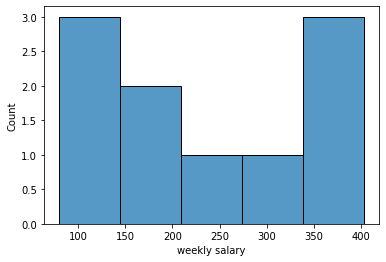

In [ ]:
sns.histplot(data=frame, x="weekly salary")

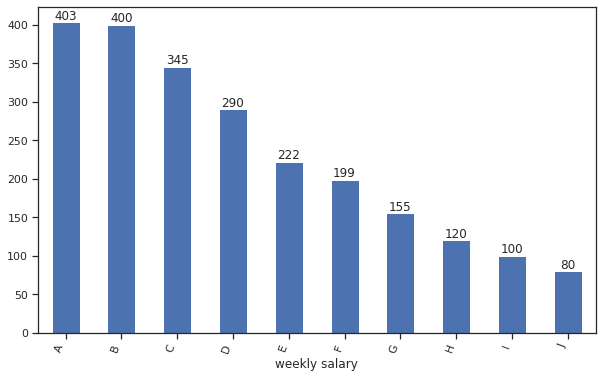

In [ ]:
plt.figure(figsize=(10,6))
ax=frame['weekly salary'].sort_values(ascending=False).plot(kind='bar')
ax.set_xticklabels(labels = frame['worker'], rotation=70, ha="right")
ax.set_xlabel("weekly salary")
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')